In [1]:
#import all the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


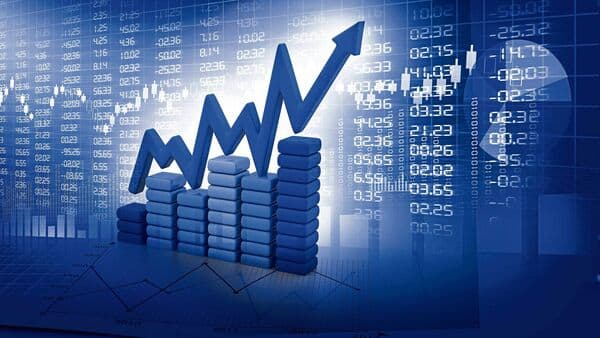

In [2]:
from IPython.display import Image
url ='https://images.livemint.com/img/2022/12/09/600x338/Nifty_1667546435835_1670548265677_1670548265677.jpg'
Image(url,height=300,width=400)

In [3]:
#importing dataset 
dataset=pd.read_csv(r"D:\projects\stock price prdicton\prices-split-adjusted.csv")

In [4]:
dataset


,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [5]:
#data called by df
df=pd.DataFrame(dataset)

In [6]:
#information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [7]:
#describeing the data 
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [8]:
df.columns 

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [9]:
#showing the columns wise % percentage od NaN values they contains

for i in df.columns:
    print(i,'\t-\t',df[i].isna().mean()*100)

date 	-	 0.0
symbol 	-	 0.0
open 	-	 0.0
close 	-	 0.0
low 	-	 0.0
high 	-	 0.0
volume 	-	 0.0


In [10]:
#the since is no valus ,we cab move further


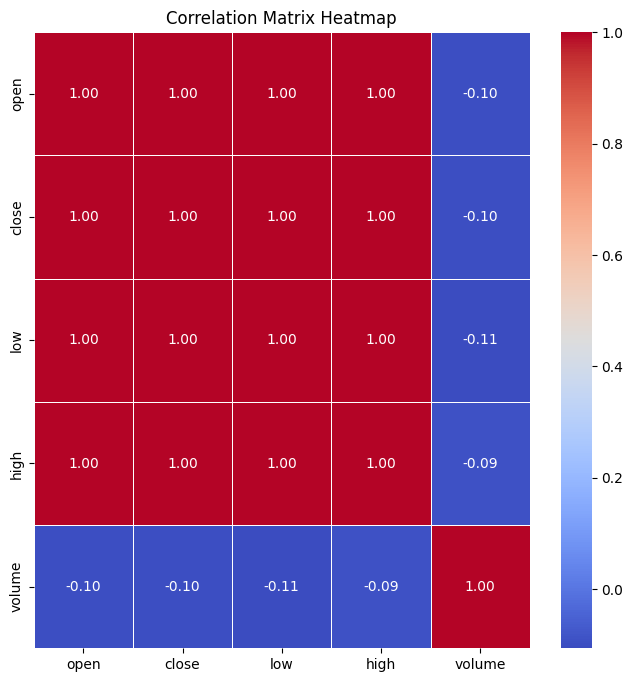

In [11]:

# Assuming 'date' is the date column and 'symbol' is the stock symbol column
# Adjust column names accordingly based on your DataFrame structure
df['date'] = pd.to_datetime(df['date'])
df = df[df['symbol'] == 'AAP']

# Select numeric columns for correlation analysis
numeric_df = df.select_dtypes(include='number')

# Check for missing values and drop if necessary
numeric_df = numeric_df.dropna()

# Calculate correlation matrix
cormap = numeric_df.corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cormap, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", ax=ax)

plt.title('Correlation Matrix Heatmap')
plt.show()


In [12]:
def get_corelated_col(cor_dat,threshold):
    #cor_data to be column along which corelation to be measured
    #threshold be the value above which of corelation to cosidered
    feature=[]
    value=[]
    
    for i, index in enumerate (cor_dat.index):
        if abs(cor_dat[index])>threshold:
            feature.append(index)
            value.append(cor_dat[index])
    
    
    df=pd.DataFrame(data=value,index=feature,columns=['corr value'])
    
    
    return(df)

In [13]:
top_corelated_values=get_corelated_col(cormap['close'],0.60)
top_corelated_values

,corr value
open,0.999382
close,1.000000
low,0.999615
high,0.999737


In [14]:
#looks like all colums except volume are highly co-related.using them for predictions.

In [15]:
df=df[top_corelated_values.index]
df.head()

,open,close,low,high
253,40.700001,40.380001,40.360001,41.040001
720,40.299999,40.139999,39.720001,40.310001
1188,40.049999,40.490002,40.049999,40.779999
1656,39.549999,40.480000,39.549999,40.540001
2124,40.250000,40.639999,40.110001,40.820000


In [16]:
df.shape

(1762, 4)

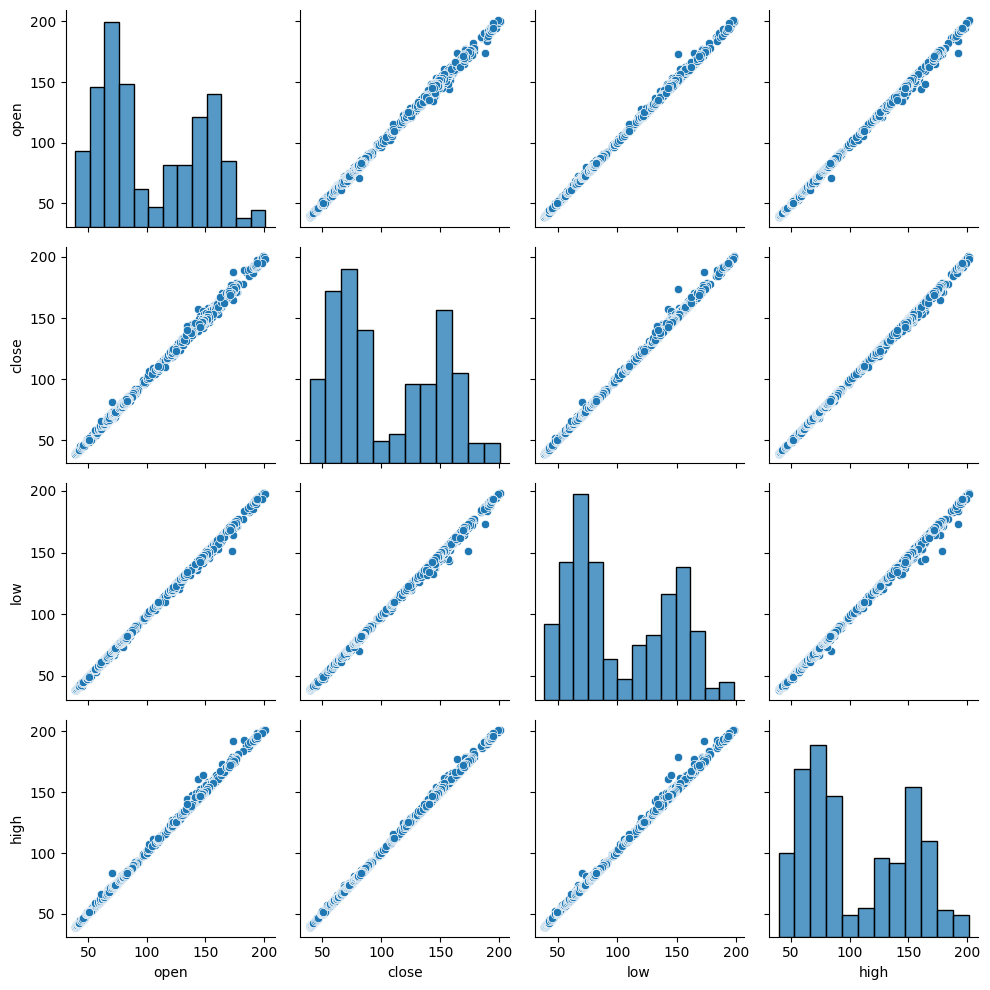

In [17]:
sns.pairplot(df)
plt.tight_layout()

since other parameter have linear relationship with close we are using some linear models fore prediction

In [18]:
X=df.drop(['close'],axis=1)
y=df['close']

since range of data in different columns veries significantky we need to scale the independent variable X for this we will use min-max scaling 

In [19]:
from sklearn.preprocessing import MinMaxScaler 
Scaler=MinMaxScaler()
X=pd.DataFrame(Scaler.fit_transform(X),columns=X.columns)
X.head()


,open,low,high
0,0.012001,0.012392,0.010256
1,0.009539,0.008387,0.005746
2,0.008000,0.010452,0.008649
3,0.004923,0.007323,0.007167
4,0.009231,0.010827,0.008897


# Prediction Model

In [20]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

Acc=[]

# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

#model training 

model_1=LinearRegression()

model_1.fit(X_train,y_train)

LinearRegression()

In [22]:
#prediction

y_pred_lr=model_1.predict(X_test)

pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_lr})

pred_df.head()

,Actual,Predicted
675111,173.660004,173.682489
675608,171.919998,172.593759
676105,172.000000,171.182789
676602,187.789993,187.980305
677099,187.029999,188.440838


In [23]:
#measure the accuracy score

from sklearn.metrics import r2_score

k='Accuracy score of the predictions:{0}'.format(r2_score(y_test,y_pred_lr))

Acc.append(r2_score(y_test,y_pred_lr))

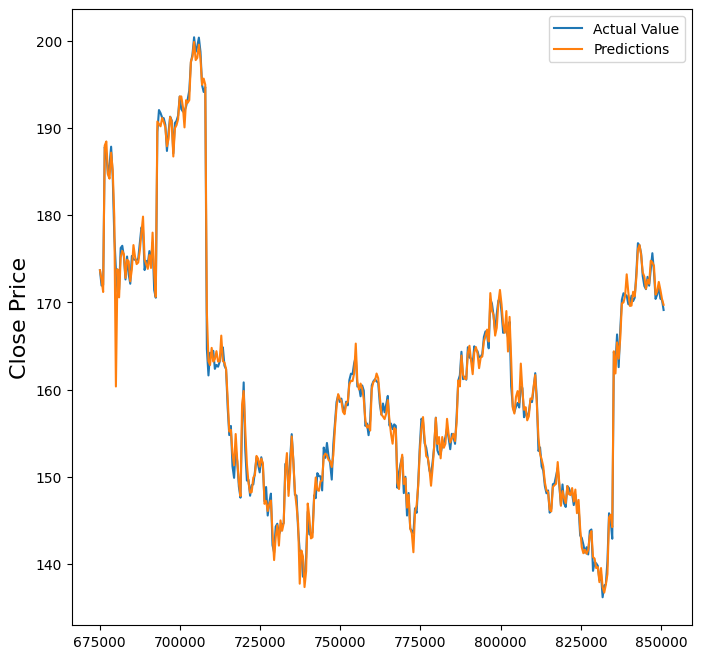

In [24]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price',fontsize=16)

plt.plot(pred_df)

plt.legend(['Actual Value','Predictions'])

plt.show()

In [25]:
import keras

# 2.ANN

In [26]:
# Model Creation

from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [27]:

model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)

Epoch 1/70
36/36 [==============================] - 3s 19ms/step - loss: 6057.5850 - val_loss: 22082.0273
Epoch 2/70
36/36 [==============================] - 0s 8ms/step - loss: 6038.8662 - val_loss: 21982.5098
Epoch 3/70
36/36 [==============================] - 0s 8ms/step - loss: 5959.0854 - val_loss: 21525.5625
Epoch 4/70
36/36 [==============================] - 0s 7ms/step - loss: 5679.3511 - val_loss: 20071.3926
Epoch 5/70
36/36 [==============================] - 0s 7ms/step - loss: 4971.4556 - val_loss: 16739.1250
Epoch 6/70
36/36 [==============================] - 0s 8ms/step - loss: 3638.0188 - val_loss: 11196.3975
Epoch 7/70
36/36 [==============================] - 0s 7ms/step - loss: 1882.6539 - val_loss: 4930.1675
Epoch 8/70
36/36 [==============================] - 0s 7ms/step - loss: 488.6917 - val_loss: 1174.0667
Epoch 9/70
36/36 [==============================] - 0s 8ms/step - loss: 55.9695 - val_loss: 301.7775
Epoch 10/70
36/36 [==============================] - 0s 8ms/s

In [28]:
#prediction
y_pred_ann=model_2.predict(X_test)

12/12 [==============================] - 0s 3ms/step


In [29]:
pred_df=pd.DataFrame({'Actual':y_test,'Pedicted':y_pred_ann.flatten()})
pred_df.head()

,Actual,Pedicted
675111,173.660004,174.152023
675608,171.919998,172.458557
676105,172.000000,170.666748
676602,187.789993,179.310089
677099,187.029999,188.199432


In [30]:
#measure the accuracy score
from sklearn.metrics import r2_score
print('-'*50)
print('Accuracy score of the predictions:{0}'.format(r2_score(y_test,y_pred_ann)))
print('-'*50)
Acc.append(r2_score(y_test,y_pred_ann))

--------------------------------------------------
Accuracy score of the predictions:0.9875164519694704
--------------------------------------------------


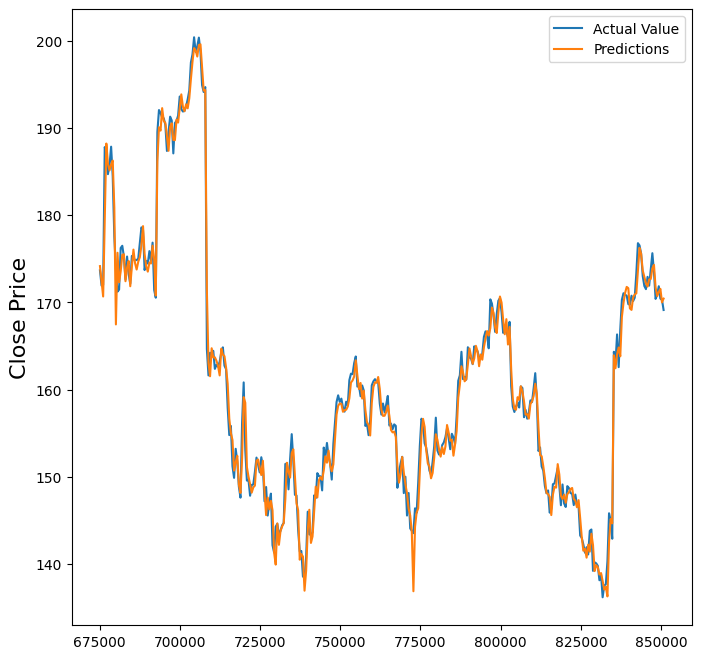

In [31]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price',fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value','Predictions'])
plt.show()

# CNN

In [32]:

X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [33]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [34]:
#model training 
model_3 =reg()
model_3.fit(X_train,y_train,epochs=100,validation_split=0.2)



Epoch 1/100
36/36 [==============================] - 3s 21ms/step - loss: 5413.8877 - val_loss: 9044.9375
Epoch 2/100
36/36 [==============================] - 1s 15ms/step - loss: 399.5542 - val_loss: 29.9292
Epoch 3/100
36/36 [==============================] - 0s 14ms/step - loss: 9.2720 - val_loss: 3.5412
Epoch 4/100
36/36 [==============================] - 0s 13ms/step - loss: 1.5877 - val_loss: 8.0279
Epoch 5/100
36/36 [==============================] - 1s 16ms/step - loss: 0.8033 - val_loss: 3.0457
Epoch 6/100
36/36 [==============================] - 0s 12ms/step - loss: 0.5440 - val_loss: 2.1801
Epoch 7/100
36/36 [==============================] - 0s 13ms/step - loss: 0.4674 - val_loss: 1.6976
Epoch 8/100
36/36 [==============================] - 0s 13ms/step - loss: 0.4423 - val_loss: 1.6742
Epoch 9/100
36/36 [==============================] - 0s 13ms/step - loss: 0.4450 - val_loss: 1.6818
Epoch 10/100
36/36 [==============================] - 1s 14ms/step - loss: 0.4542 - val_los

36/36 [==============================] - 0s 10ms/step - loss: 0.6413 - val_loss: 1.6073
Epoch 83/100
36/36 [==============================] - 0s 13ms/step - loss: 0.4639 - val_loss: 2.2238
Epoch 84/100
36/36 [==============================] - 0s 11ms/step - loss: 0.4492 - val_loss: 1.6169
Epoch 85/100
36/36 [==============================] - 0s 12ms/step - loss: 0.5336 - val_loss: 1.6867
Epoch 86/100
36/36 [==============================] - 0s 12ms/step - loss: 0.4702 - val_loss: 2.9836
Epoch 87/100
36/36 [==============================] - 0s 10ms/step - loss: 0.5492 - val_loss: 1.6358
Epoch 88/100
36/36 [==============================] - 0s 10ms/step - loss: 0.4488 - val_loss: 1.5915
Epoch 89/100
36/36 [==============================] - 0s 10ms/step - loss: 0.4268 - val_loss: 2.3002
Epoch 90/100
36/36 [==============================] - 0s 11ms/step - loss: 0.4677 - val_loss: 1.5906
Epoch 91/100
36/36 [==============================] - 0s 11ms/step - loss: 0.5711 - val_loss: 1.8560
Epo

In [35]:
y_pred_cnn=model_3.predict(X_test)

12/12 [==============================] - 0s 4ms/step


In [36]:
pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_cnn.flatten()})

pred_df.head()

,Actual,Predicted
675111,173.660004,175.075165
675608,171.919998,173.437119
676105,172.000000,171.622360
676602,187.789993,180.664627
677099,187.029999,189.347916


In [37]:
#Measure the Accuracy Score 

from sklearn.metrics import r2_score

print('Accuracy score of the prediction:{0}'.format(r2_score(y_test,y_pred_cnn)))

Acc.append(r2_score(y_test,y_pred_cnn))

Accuracy score of the prediction:0.9871471496358655


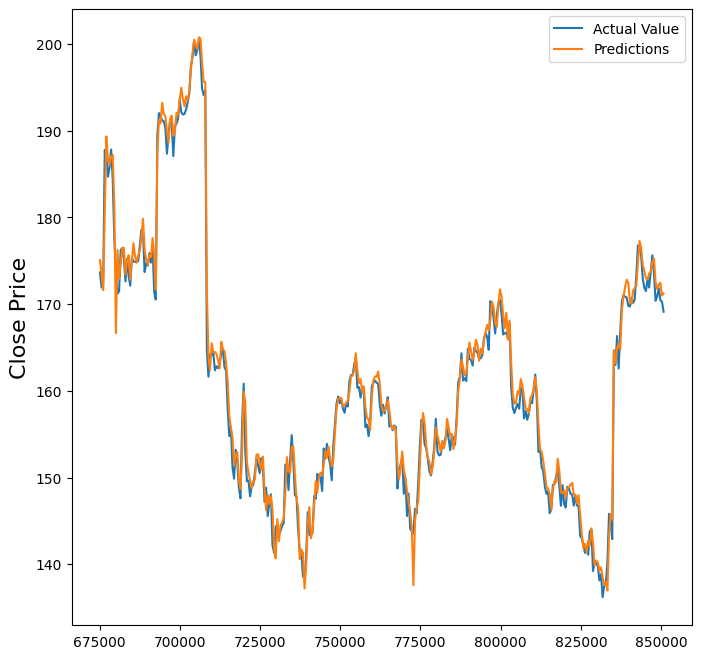

In [38]:
#ploting 
plt.figure(figsize=(8,8))
plt.ylabel('Close Price',fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value','Predictions'])
plt.show()

Comparision of accuracies of different models

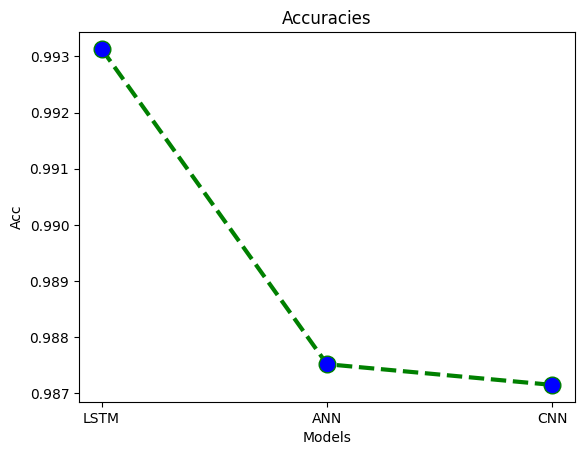

In [39]:
plt.plot(range(3),Acc,color='green',linestyle='dashed',linewidth=3,marker='o',markerfacecolor='blue',markersize=12)

plt.ylabel("Acc")

plt.xlabel('Models')

plt.title('Accuracies')

plt.xticks(range(3),['LSTM','ANN','CNN'])


plt.show()

In [40]:
#now converting data in a time series data and applying some more models


In [41]:
close=df.reset_index()['close']
close.head()

0    40.380001
1    40.139999
2    40.490002
3    40.480000
4    40.639999
Name: close, dtype: float64

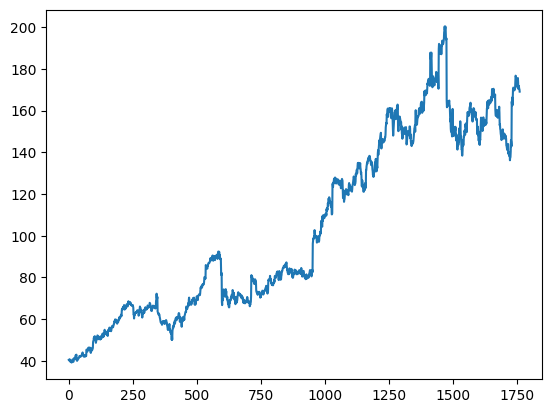

In [42]:
plt.plot(close)
plt.show()

In [43]:
time_step=30
X,y =[],[]

for i in range(len(close)-time_step-1):
    
    X.append(close[i:(i+time_step)])
    y.append(close[(i+time_step)])

X=np.array(X)

y=np.array(y)

In [44]:
X[:5]

array([[40.380001, 40.139999, 40.490002, 40.48    , 40.639999, 40.240002,
        39.540001, 40.09    , 39.560001, 39.310001, 39.5     , 39.16    ,
        39.23    , 39.740002, 40.5     , 40.549999, 40.59    , 39.77    ,
        39.450001, 40.490002, 41.189999, 41.189999, 40.93    , 40.720001,
        40.810001, 41.57    , 42.330002, 42.549999, 42.810001, 42.630001],
       [40.139999, 40.490002, 40.48    , 40.639999, 40.240002, 39.540001,
        40.09    , 39.560001, 39.310001, 39.5     , 39.16    , 39.23    ,
        39.740002, 40.5     , 40.549999, 40.59    , 39.77    , 39.450001,
        40.490002, 41.189999, 41.189999, 40.93    , 40.720001, 40.810001,
        41.57    , 42.330002, 42.549999, 42.810001, 42.630001, 42.880001],
       [40.490002, 40.48    , 40.639999, 40.240002, 39.540001, 40.09    ,
        39.560001, 39.310001, 39.5     , 39.16    , 39.23    , 39.740002,
        40.5     , 40.549999, 40.59    , 39.77    , 39.450001, 40.490002,
        41.189999, 41.189999, 40.93 

In [45]:
y[:5]

array([42.880001, 40.150002, 40.      , 40.240002, 40.220001])

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

X=scaler.fit_transform(X)

pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.007567,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,...,0.007420,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399
1,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,...,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957
2,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,...,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935
3,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,...,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000
4,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,0.003598,...,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000,0.001496


In [47]:
#pridiction
#now lets split data in test train pairs
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Acc=[]

# LSTM Type of RNN

In [48]:
X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [49]:
from tensorflow.keras.layers import LSTM

def Reg():
    model = Sequential()
    
    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [50]:
#model Training 

model_4=reg()

model_4.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 4s 40ms/step - loss: 6717.3364 - val_loss: 275.8741
Epoch 2/100
35/35 [==============================] - 1s 23ms/step - loss: 200.2831 - val_loss: 52.6698
Epoch 3/100
35/35 [==============================] - 1s 26ms/step - loss: 45.3272 - val_loss: 49.7160
Epoch 4/100
35/35 [==============================] - 1s 26ms/step - loss: 39.9802 - val_loss: 40.1008
Epoch 5/100
35/35 [==============================] - 1s 31ms/step - loss: 41.3979 - val_loss: 41.2572
Epoch 6/100
35/35 [==============================] - 1s 31ms/step - loss: 39.8936 - val_loss: 38.4189
Epoch 7/100
35/35 [==============================] - 1s 34ms/step - loss: 38.3343 - val_loss: 37.4189
Epoch 8/100
35/35 [==============================] - 1s 32ms/step - loss: 37.0662 - val_loss: 37.8102
Epoch 9/100
35/35 [==============================] - 1s 32ms/step - loss: 37.4218 - val_loss: 37.8477
Epoch 10/100
35/35 [==============================] - 1s 30ms/step - loss: 37.

35/35 [==============================] - 1s 25ms/step - loss: 5.4636 - val_loss: 13.0482
Epoch 82/100
35/35 [==============================] - 1s 28ms/step - loss: 5.9129 - val_loss: 6.5377
Epoch 83/100
35/35 [==============================] - 1s 30ms/step - loss: 5.8474 - val_loss: 6.6540
Epoch 84/100
35/35 [==============================] - 1s 25ms/step - loss: 6.2770 - val_loss: 7.8355
Epoch 85/100
35/35 [==============================] - 1s 25ms/step - loss: 5.6702 - val_loss: 6.3780
Epoch 86/100
35/35 [==============================] - 1s 29ms/step - loss: 5.8886 - val_loss: 6.5990
Epoch 87/100
35/35 [==============================] - 1s 28ms/step - loss: 6.0121 - val_loss: 8.8921
Epoch 88/100
35/35 [==============================] - 1s 24ms/step - loss: 7.9558 - val_loss: 6.5845
Epoch 89/100
35/35 [==============================] - 1s 27ms/step - loss: 5.0133 - val_loss: 6.1570
Epoch 90/100
35/35 [==============================] - 1s 25ms/step - loss: 6.5843 - val_loss: 7.0322
Ep

In [51]:
y_pred_1=model_4.predict(X_test)

11/11 [==============================] - 0s 12ms/step


In [52]:
pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,68.000000,70.859802
1,148.050003,149.710358
2,145.339996,145.811417
3,85.570000,83.281776
4,151.710007,152.807007


In [53]:
#measure the Accuracy Score

from sklearn.metrics import r2_score
print('Accuracy score of the Predictions:{0}'.format(r2_score(y_test,y_pred_1)))

Acc.append(r2_score(y_test,y_pred_1))
      


Accuracy score of the Predictions:0.9946664842419852


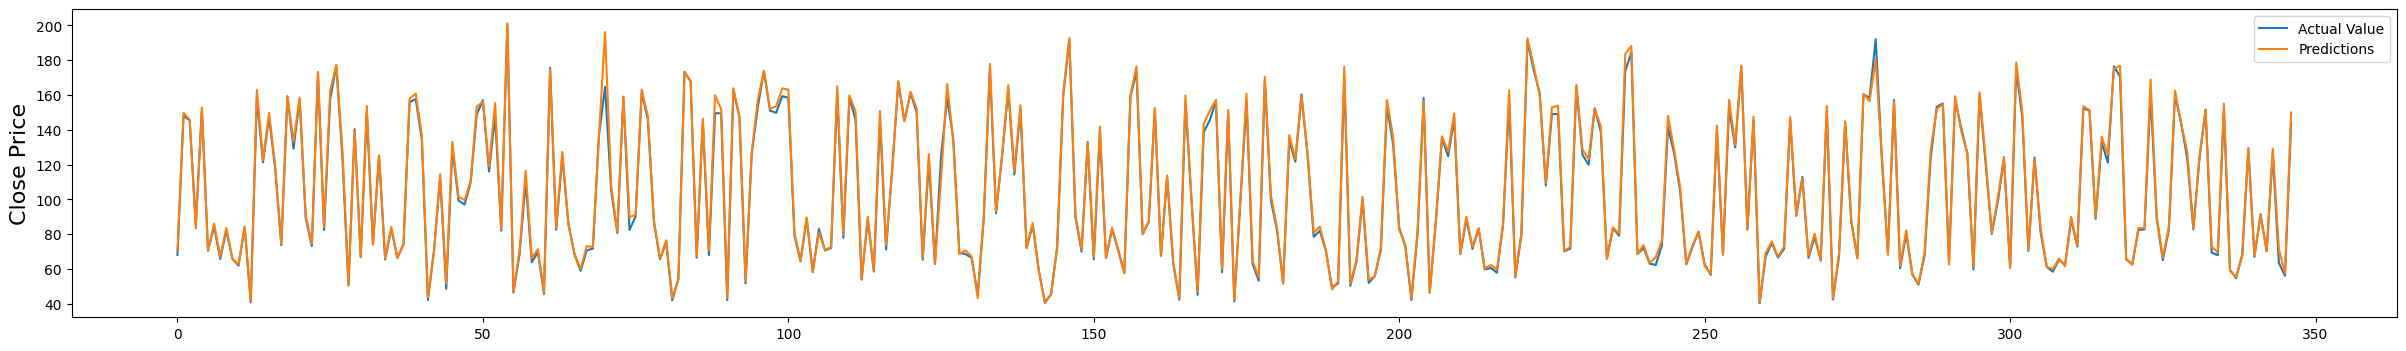

In [54]:
plt.figure(figsize=(30,4))
plt.ylabel('Close Price',fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value','Predictions'])
plt.show()

# ANN

In [55]:
model_5=regressor(inp_dim=30)
model_5.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 4s 19ms/step - loss: 13065.1836 - val_loss: 12231.7012
Epoch 2/100
35/35 [==============================] - 0s 9ms/step - loss: 12993.5000 - val_loss: 12062.0801
Epoch 3/100
35/35 [==============================] - 0s 11ms/step - loss: 12503.9414 - val_loss: 11079.4844
Epoch 4/100
35/35 [==============================] - 0s 10ms/step - loss: 10407.9707 - val_loss: 7925.2427
Epoch 5/100
35/35 [==============================] - 0s 9ms/step - loss: 5686.8091 - val_loss: 2686.1638
Epoch 6/100
35/35 [==============================] - 0s 10ms/step - loss: 1154.4761 - val_loss: 361.9821
Epoch 7/100
35/35 [==============================] - 0s 10ms/step - loss: 319.4802 - val_loss: 336.9759
Epoch 8/100
35/35 [==============================] - 0s 10ms/step - loss: 308.0082 - val_loss: 328.7101
Epoch 9/100
35/35 [==============================] - 0s 9ms/step - loss: 298.7785 - val_loss: 318.1358
Epoch 10/100
35/35 [=============================

Epoch 80/100
35/35 [==============================] - 0s 11ms/step - loss: 23.0930 - val_loss: 24.9319
Epoch 81/100
35/35 [==============================] - 0s 11ms/step - loss: 22.5547 - val_loss: 24.4837
Epoch 82/100
35/35 [==============================] - 0s 11ms/step - loss: 22.1950 - val_loss: 24.9711
Epoch 83/100
35/35 [==============================] - 0s 11ms/step - loss: 21.9639 - val_loss: 24.0416
Epoch 84/100
35/35 [==============================] - 0s 11ms/step - loss: 22.2386 - val_loss: 23.7976
Epoch 85/100
35/35 [==============================] - 0s 10ms/step - loss: 21.5418 - val_loss: 23.9321
Epoch 86/100
35/35 [==============================] - 0s 11ms/step - loss: 21.3980 - val_loss: 23.4141
Epoch 87/100
35/35 [==============================] - 0s 11ms/step - loss: 21.0177 - val_loss: 23.1895
Epoch 88/100
35/35 [==============================] - 0s 10ms/step - loss: 20.6181 - val_loss: 23.3252
Epoch 89/100
35/35 [==============================] - 0s 10ms/step - loss

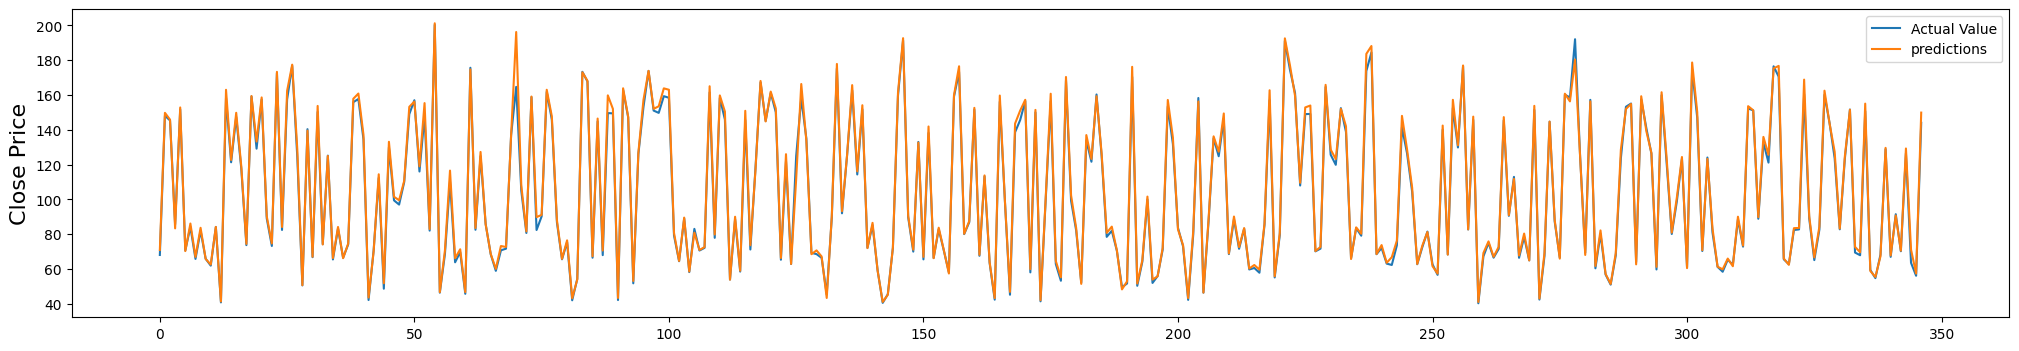

In [56]:
plt.figure(figsize=(25,4))
plt.ylabel('Close Price',fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value','predictions'])
plt.show()

# 3.CNN

In [57]:
#model Training 
model_6=reg()
model_6.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 6s 43ms/step - loss: 6110.4785 - val_loss: 547.0116
Epoch 2/100
35/35 [==============================] - 1s 27ms/step - loss: 161.1107 - val_loss: 62.6414
Epoch 3/100
35/35 [==============================] - 1s 28ms/step - loss: 45.7916 - val_loss: 40.8594
Epoch 4/100
35/35 [==============================] - 1s 27ms/step - loss: 41.4801 - val_loss: 39.8269
Epoch 5/100
35/35 [==============================] - 1s 27ms/step - loss: 38.9386 - val_loss: 40.5357
Epoch 6/100
35/35 [==============================] - 1s 27ms/step - loss: 39.5131 - val_loss: 38.1878
Epoch 7/100
35/35 [==============================] - 1s 27ms/step - loss: 38.3670 - val_loss: 44.3899
Epoch 8/100
35/35 [==============================] - 1s 27ms/step - loss: 36.6874 - val_loss: 38.2983
Epoch 9/100
35/35 [==============================] - 1s 30ms/step - loss: 39.1499 - val_loss: 42.6268
Epoch 10/100
35/35 [==============================] - 1s 26ms/step - loss: 36.

35/35 [==============================] - 1s 38ms/step - loss: 6.8640 - val_loss: 10.7020
Epoch 82/100
35/35 [==============================] - 1s 39ms/step - loss: 6.6064 - val_loss: 6.0504
Epoch 83/100
35/35 [==============================] - 1s 32ms/step - loss: 5.5680 - val_loss: 5.2609
Epoch 84/100
35/35 [==============================] - 1s 29ms/step - loss: 6.1038 - val_loss: 9.2781
Epoch 85/100
35/35 [==============================] - 1s 32ms/step - loss: 5.5426 - val_loss: 7.3968
Epoch 86/100
35/35 [==============================] - 1s 29ms/step - loss: 5.5447 - val_loss: 5.4032
Epoch 87/100
35/35 [==============================] - 1s 29ms/step - loss: 5.3080 - val_loss: 5.4999
Epoch 88/100
35/35 [==============================] - 1s 29ms/step - loss: 5.7579 - val_loss: 7.0634
Epoch 89/100
35/35 [==============================] - 1s 29ms/step - loss: 5.3286 - val_loss: 5.3090
Epoch 90/100
35/35 [==============================] - 1s 32ms/step - loss: 4.9039 - val_loss: 8.9757
Ep

In [58]:
y_pred_3=model_6.predict(X_test)

11/11 [==============================] - 0s 12ms/step


In [59]:
pred_df=pd.DataFrame({'Actual':y_test,'predicted':y_pred_3.flatten()})

pred_df.head()

,Actual,predicted
0,68.000000,69.634476
1,148.050003,147.860779
2,145.339996,143.396851
3,85.570000,83.227524
4,151.710007,150.322418


In [60]:
#measure the Accracy Score
from sklearn.metrics import r2_score

print('Accuracy score of the predictions:{0}'.format(r2_score(y_test,y_pred_3)))

Acc.append(r2_score(y_test,y_pred_3))

Accuracy score of the predictions:0.9964967285430504


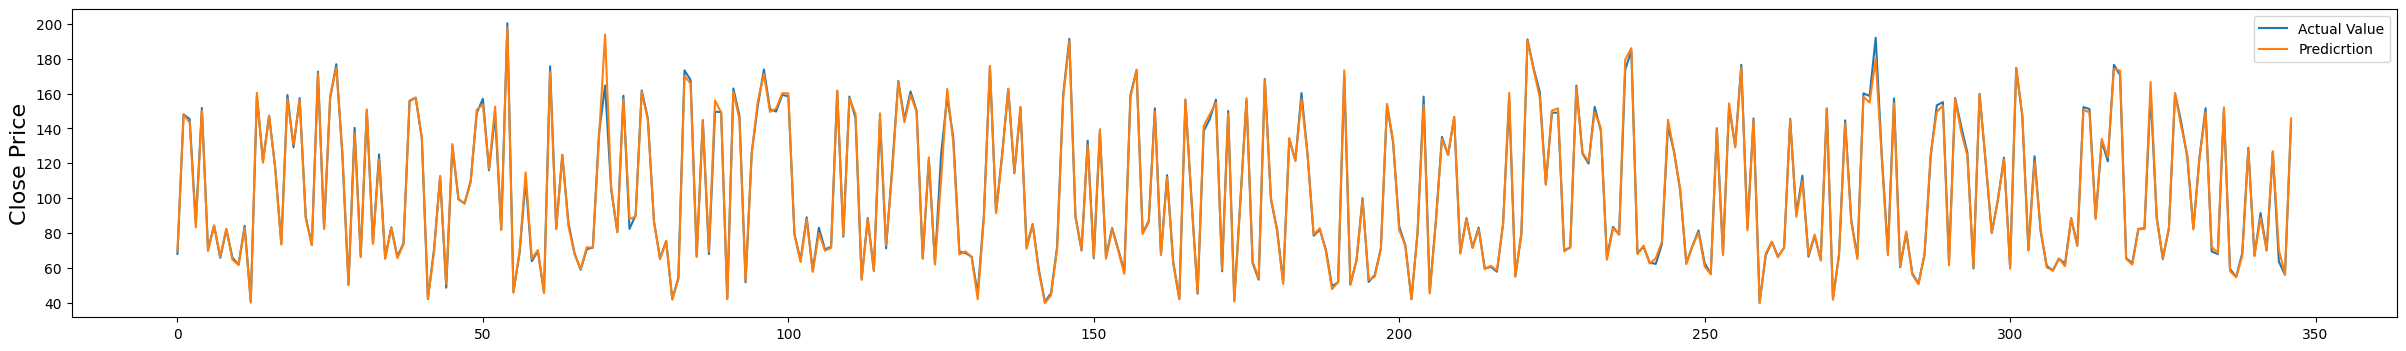

In [61]:
plt.figure(figsize=(30,4))
plt.ylabel('Close Price',fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value','Predicrtion'])

plt.show()